In [2]:
import pandas as pd
from sklearn.mixture import GaussianMixture

In [3]:
df = pd.read_csv('Wine.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [7]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

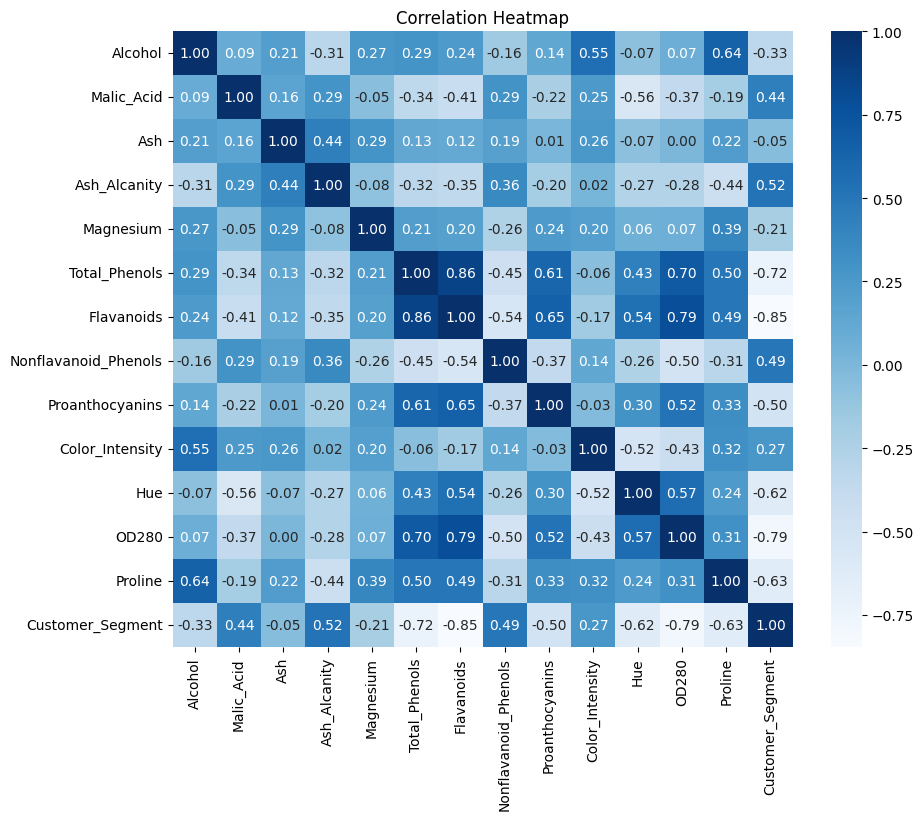

In [41]:
import seaborn as sns
# Построим матрицу корреляции
corr = df.corr()
# Нарисуем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

### Silhouette score - это метрика, используемая для оценки качества кластеризации данных. Она измеряет, насколько объект хорошо сгруппирован в своем собственном кластере по сравнению с тем, насколько он плохо сгруппирован в других кластерах.

In [30]:
#Выбираем лучшее количество кластеров
min_clusters = 2
max_clusters = 10
best_score = -1
best_n_clusters = 0
silhouette_scores = []

for n_clusters in range(min_clusters, max_clusters+1):
    gmm = GaussianMixture(n_components=n_clusters)
    labels = gmm.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels)
    silhouette_scores.append(silhouette_avg)

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters

print("Best number of clusters:", best_n_clusters)
print("Silhouette Score:",best_score)

Best number of clusters: 2
Silhouette Score: 0.5831778085570662


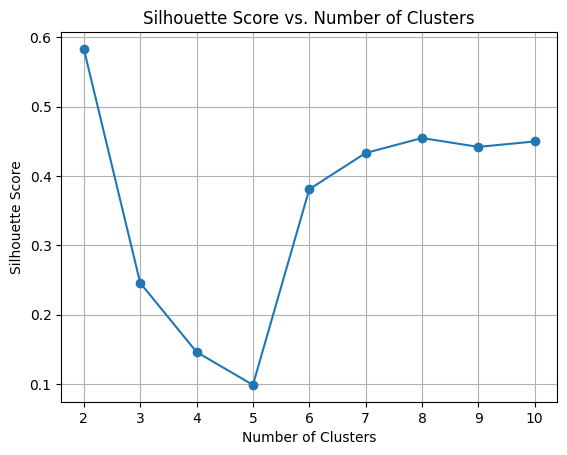

In [76]:
# Построим график Silhouette score в зависимости от количества кластеров
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(min_clusters, max_clusters+1, step=1))
plt.grid(True)
plt.show()

Заметим, что когда число кластеров равно 5, кэффициент силуэта минимальный. Максимум достигает при количестве кластеров равной двум

In [62]:
#Понижение размерности данных

from sklearn.decomposition import PCA
X = df.values

pca = PCA(n_components=2)
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
reduced_X

,PCA1,PCA2
0,318.564055,21.490773
1,303.098514,-5.366083
2,438.062063,-6.537986
3,733.240711,0.193320
4,-11.569952,18.487255
...,...,...
173,-6.981858,-4.538116
174,3.129945,2.338236
175,88.456310,18.779644
176,93.454472,18.674180


In [78]:
#Выбираем лучшее количество кластеров
min_clusters = 2
max_clusters = 10
best_score = -1
best_n_clusters = 0
silhouette_scores = []

for n_clusters in range(min_clusters, max_clusters+1):
    gmm = GaussianMixture(n_components=n_clusters)
    labels = gmm.fit_predict(reduced_X)
    silhouette_avg = silhouette_score(reduced_X, labels)
    silhouette_scores.append(silhouette_avg)

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters

print("Best number of clusters:", best_n_clusters)
print("Silhouette Score:",best_score)

Best number of clusters: 2
Silhouette Score: 0.6507072013959457


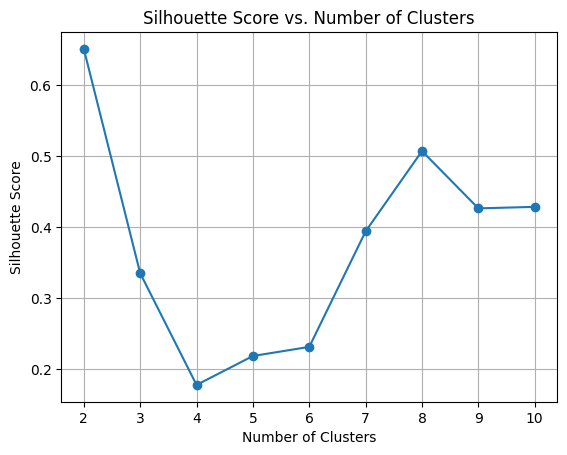

In [79]:
# Построим график Silhouette score в зависимости от количества кластеров
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(min_clusters, max_clusters+1, step=1))
plt.grid(True)
plt.show()

Заметим, что при понижении размерности, максимальный коэфффициент увеличился на 7 сотых, что считается хорошим результатом

Text(0.5, 1.0, 'Cluster visualization\n')

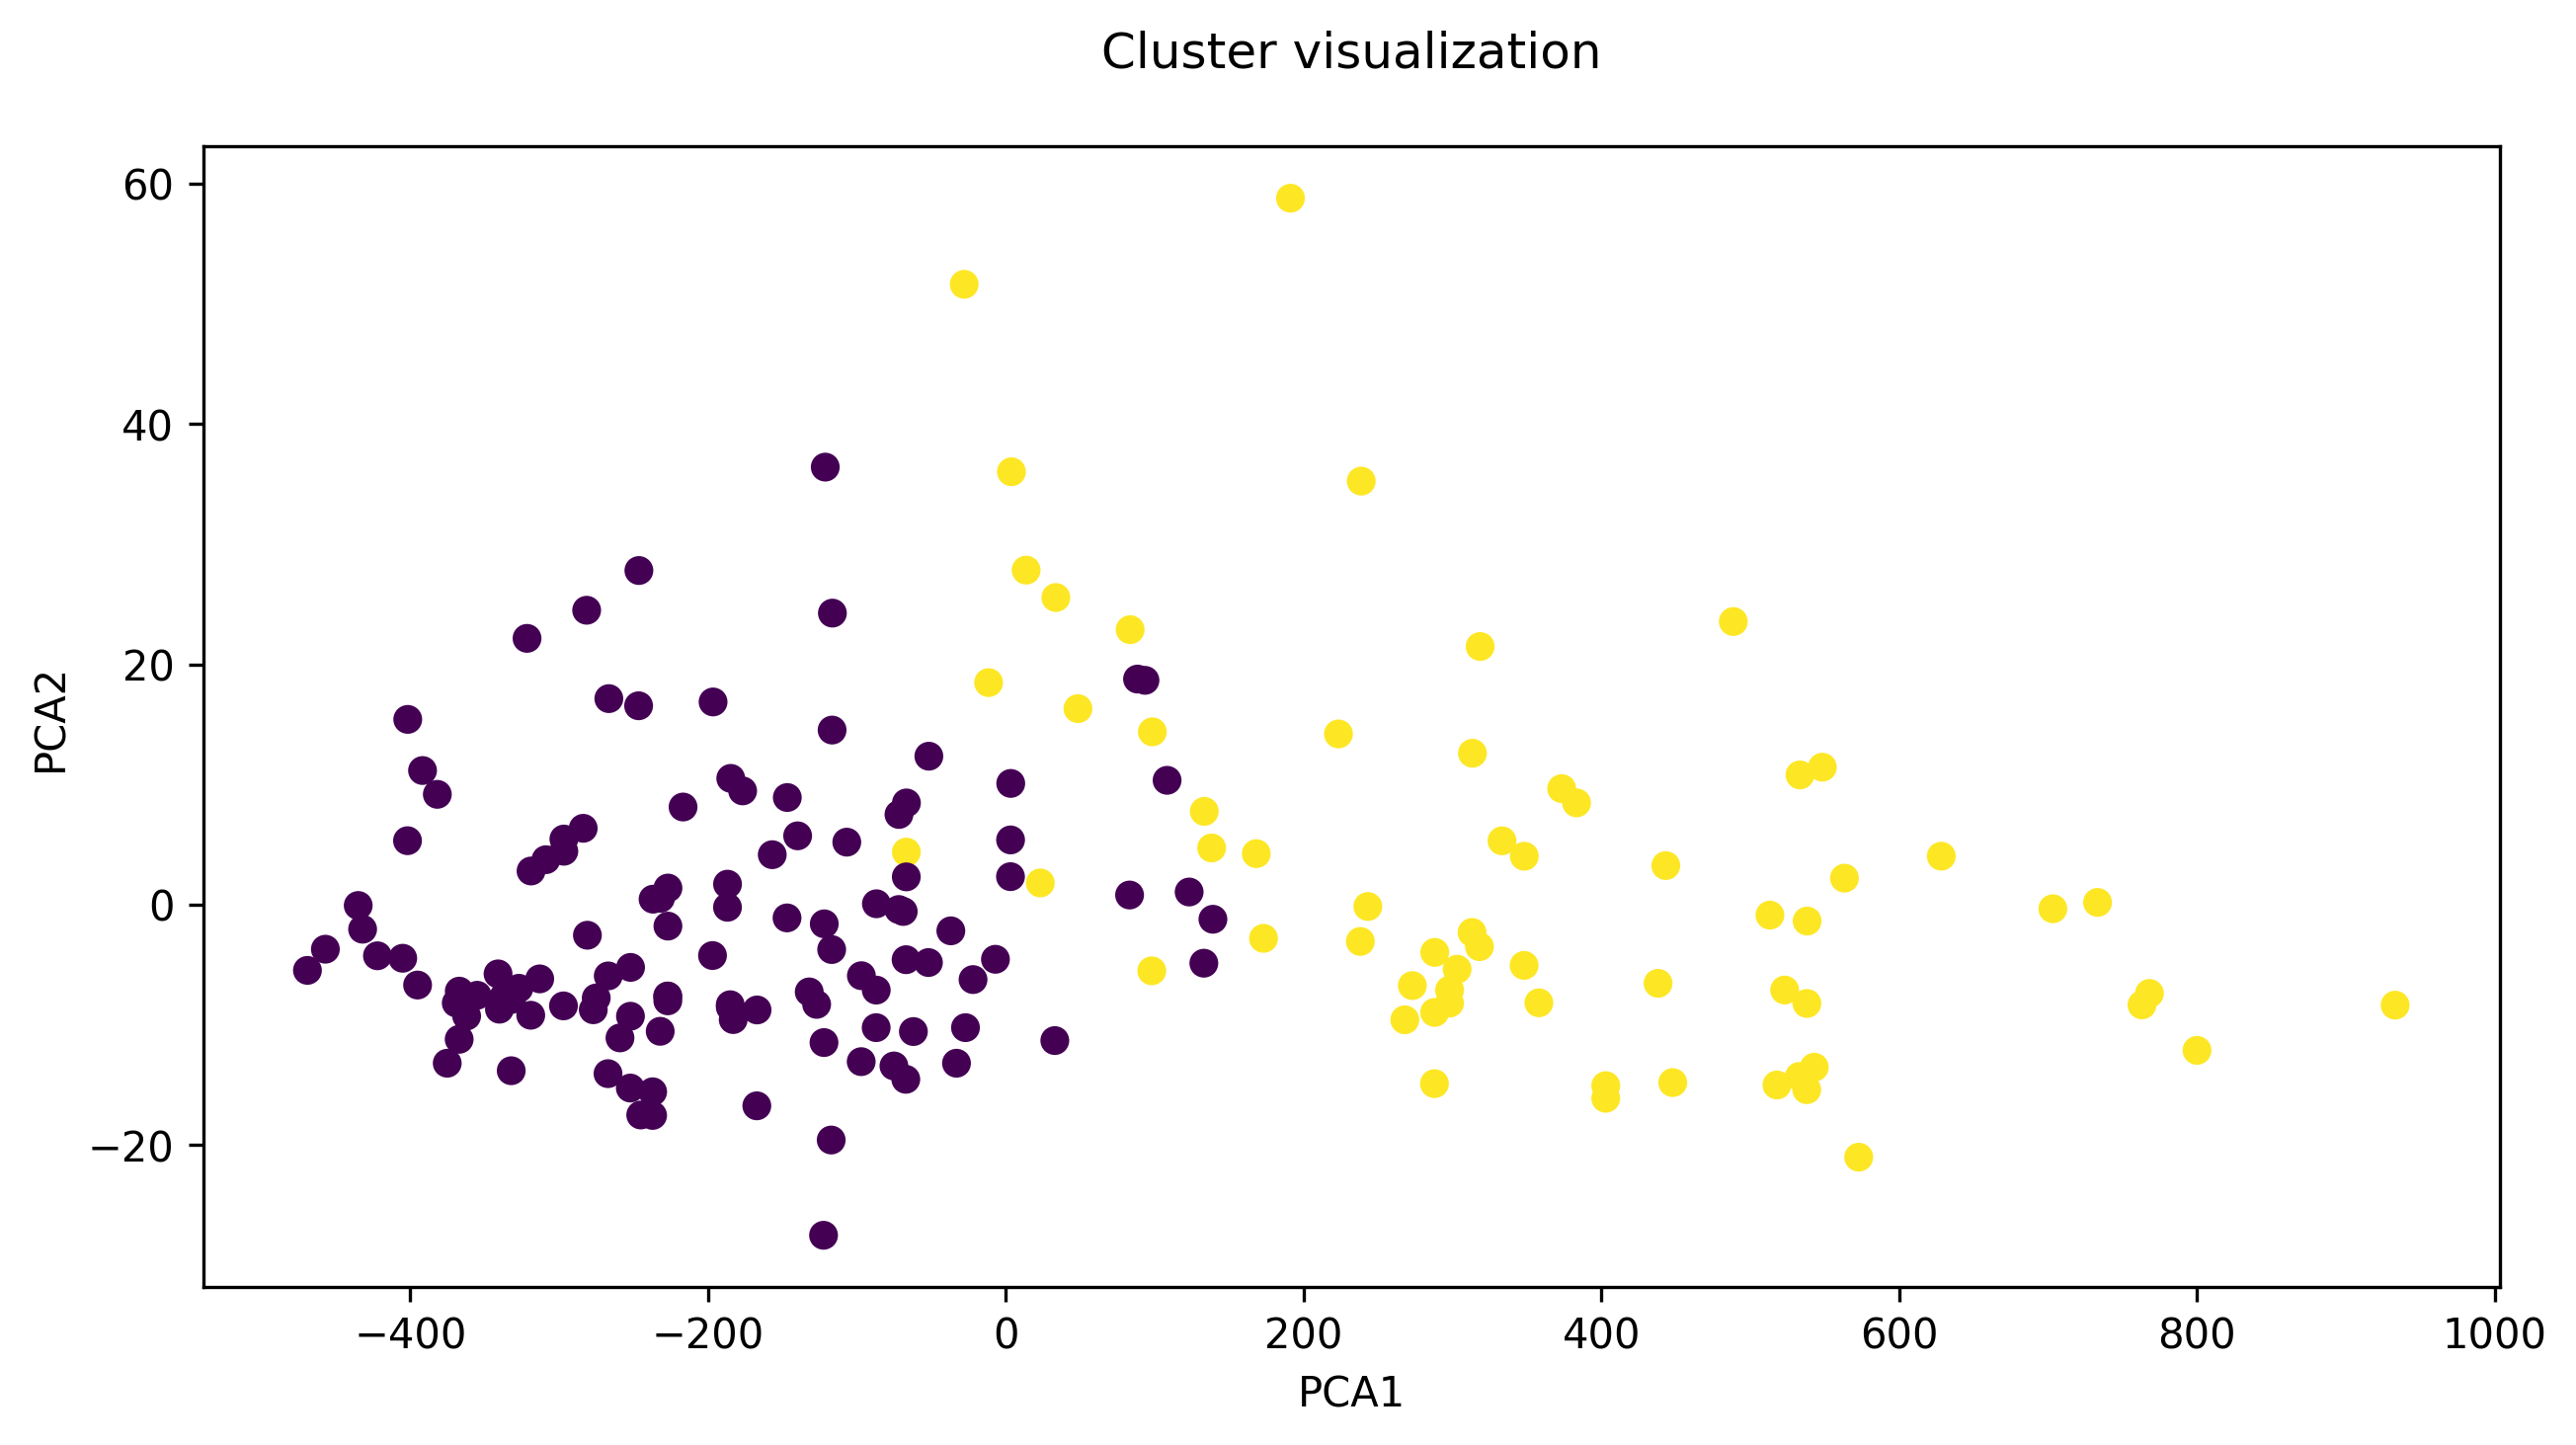

In [66]:
plt.figure(figsize=(10,5),dpi=300)
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=gmm_labels, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Cluster visualization\n')


Кластеры распределены хорошо

In [67]:
# Extract the means of the clusters
means = gmm.means_

# Display the means
print("Means of the clusters:")
for i, mean in enumerate(means):
    print(f"Cluster {i+1}: {mean}")

Means of the clusters:
Cluster 1: [1.26362608e+01 2.53799968e+00 2.32921731e+00 2.07330423e+01
 9.47130520e+01 2.01226085e+00 1.53878267e+00 4.02434772e-01
 1.39669593e+00 4.88669534e+00 8.95269599e-01 2.32226087e+00
 5.54173953e+02 2.41739122e+00]
Cluster 2: [1.36657148e+01 1.96825433e+00 2.43460336e+00 1.72349215e+01
 1.08920625e+02 2.81142891e+00 2.92460358e+00 2.87777755e-01
 1.94539652e+00 5.37095312e+00 1.07095238e+00 3.14000031e+00
 1.09868267e+03 1.06349171e+00]


In [80]:
from IPython.display import display


# Создание DataFrame для хранения средних значений признаков для каждого кластера
clusters_means_df = pd.DataFrame(columns=[f'Feature {i+1}' for i in range(X.shape[1])], index=[f'Cluster {i+1}' for i in range(means.shape[0])])

# Заполнение DataFrame средними значениями признаков для каждого кластера
for i, mean in enumerate(means):
    clusters_means_df.iloc[i] = mean


# Вывод DataFrame средних значений кластеров
display(clusters_means_df)



,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11,Feature 12,Feature 13,Feature 14
Cluster 1,12.636261,2.538,2.329217,20.733042,94.713052,2.012261,1.538783,0.402435,1.396696,4.886695,0.89527,2.322261,554.173953,2.417391
Cluster 2,13.665715,1.968254,2.434603,17.234922,108.920625,2.811429,2.924604,0.287778,1.945397,5.370953,1.070952,3.14,1098.68267,1.063492
